In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 7)
import matplotlib
matplotlib.style.use('classic')
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../../Processed Data/10K10Q/10K_10Q_dataset.csv")
df.item = df.item.apply(lambda x : x)
df["bow_sim"] = df["bow_sim"].fillna(1)
df["tfidf_sim"] = df["tfidf_sim"].fillna(1)
df = df.fillna(0)
df.date = pd.to_datetime(df.date, dayfirst=False)
df = df[~df.Symbol.isin(["DOW", "WBA", "TRV", "DIS"])]

In [3]:
dictionary = {"item1":"item7","item3":"item7a","item1a":"item1a"}
new_item = []
for index, row in df.iterrows():
    if row["text_type"] == "10Q":
        new_item.append(dictionary[row["item"]])
    else:
        new_item.append(row["item"])
df["item"] = new_item

In [4]:
train = df[df.date <= pd.to_datetime("2017-12-31", dayfirst=False)].copy()
test = df[df.date >= pd.to_datetime("2018-01-01", dayfirst=False)].copy()

In [5]:
train["y"] = train["3_month_rtn"].apply(lambda x: 1 if x > 0 else -1)
test["y"] = test["3_month_rtn"].apply(lambda x: 1 if x > 0 else -1)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier

In [7]:
x_vars = ['bow_sim', 'Word_Chng', 'Negative_Chng', 'Positive_Chng',
       'Uncertainty_Chng', 'Litigious_Chng', 'StrongModal_Chng',
       'WeakModal_Chng', 'Constraining_Chng', 'tfidf_sim']
y_vars = "y"

In [8]:
for item in df.item.unique():
    X_train = train[train.item == item][x_vars]
    y_train = train[train.item == item][y_vars]

    X_test = test[test.item == item][x_vars]
    y_test = test[test.item == item][y_vars]
    print(f"Analytics for {item}")
    model = RandomForestClassifier(random_state=1)
    model.fit(X_train, y_train)
    print("Train Accuracy: ", accuracy_score(y_pred=model.predict(X_train), y_true=y_train))
    preds = model.predict(X_test)
    print("Test Accuracy: ", accuracy_score(y_pred=preds, y_true=y_test))
    print("F1-Score: ", f1_score(y_pred=preds, y_true=y_test))
    print("AUC: ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print("")
    print("")

Analytics for item7
Train Accuracy:  0.9050480769230769
Test Accuracy:  0.502283105022831
F1-Score:  0.6007326007326007
AUC:  0.49957074175824173


Analytics for item1a
Train Accuracy:  0.8342391304347826
Test Accuracy:  0.5743589743589743
F1-Score:  0.6844106463878328
AUC:  0.4920944336149014


Analytics for item7a
Train Accuracy:  0.7742346938775511
Test Accuracy:  0.5217391304347826
F1-Score:  0.6526315789473685
AUC:  0.48901833460656985




c:\users\acer\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\acer\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Analytics for item7
Train Accuracy:  0.8161057692307693
Test Accuracy:  0.5799086757990868
F1-Score:  0.7032258064516128
AUC:  0.5599244505494505


Analytics for item1a
Train Accuracy:  0.7839673913043478
Test Accuracy:  0.5435897435897435
F1-Score:  0.6920415224913495
AUC:  0.4564652371669915


Analytics for item7a
Train Accuracy:  0.7423469387755102
Test Accuracy:  0.5555555555555556
F1-Score:  0.6891891891891893
AUC:  0.5191940412528647




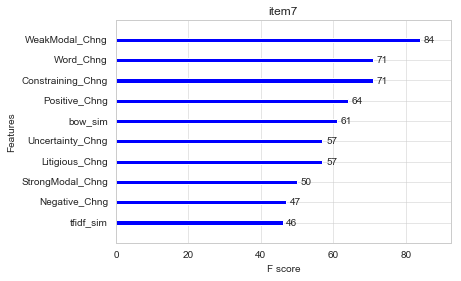

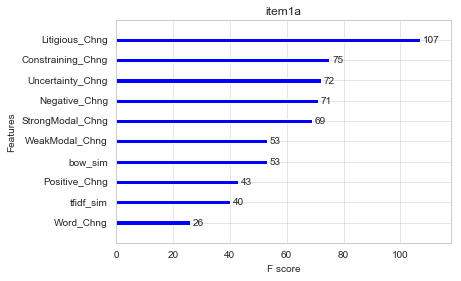

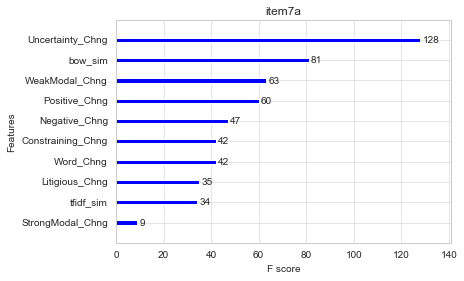

In [9]:
for item in df.item.unique():
    X_train = train[train.item == item][x_vars]
    y_train = train[train.item == item][y_vars]

    X_test = test[test.item == item][x_vars]
    y_test = test[test.item == item][y_vars]
    print(f"Analytics for {item}")
    model = XGBClassifier(random_state=1)
    model.fit(X_train, y_train)
    print("Train Accuracy: ", accuracy_score(y_pred=model.predict(X_train), y_true=y_train))
    preds = model.predict(X_test)
    print("Test Accuracy: ", accuracy_score(y_pred=preds, y_true=y_test))
    print("F1-Score: ", f1_score(y_pred=preds, y_true=y_test))
    print("AUC: ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    
    plot_importance(model)
    plt.title(item)
    
    print("")
    print("")

In [10]:
df.groupby(["Symbol", "date"]).count()["CIK"].value_counts()

3    901
2    120
1     30
Name: CIK, dtype: int64

In [11]:
from tqdm import tqdm_notebook as tqdm
unique_dates = df[["Symbol", "date"]].drop_duplicates()
final_dataset = pd.DataFrame()
variables = ['bow_sim', 'Word_Chng', 'Negative_Chng', 'Positive_Chng',
       'Uncertainty_Chng', 'Litigious_Chng', 'StrongModal_Chng',
       'WeakModal_Chng', 'Constraining_Chng', 'tfidf_sim']
for i in tqdm(range(len(unique_dates))):
    Symbol = unique_dates.iloc[i]["Symbol"]
    date = unique_dates.iloc[i]["date"]
    temp = df[(df.Symbol == Symbol) & (df.date == date)].copy()
    company_df = temp.iloc[:1].copy()
    for v in variables:
        company_df[company_df.item.values[0] + "_" + v] = company_df[v].values[0]
        company_df.drop(columns=v, inplace=True)
    if len(temp) > 1:
        for index in range(1, len(temp)):
            next_df = temp.iloc[index:index+1]
            for v in variables:
                company_df[next_df.item.values[0] + "_" + v] = next_df[v].values[0]
    
    final_dataset = pd.concat([final_dataset, company_df], sort=False)

In [12]:
len(final_dataset)

1051

In [13]:
final_dataset

,CIK,text_type,item,date,year,file_path,Symbol,Security,SEC filings,GICS Sector,...,item7a_bow_sim,item7a_Word_Chng,item7a_Negative_Chng,item7a_Positive_Chng,item7a_Uncertainty_Chng,item7a_Litigious_Chng,item7a_StrongModal_Chng,item7a_WeakModal_Chng,item7a_Constraining_Chng,item7a_tfidf_sim
0,4962,10Q,item7,2010-05-05,2010,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
1,4962,10Q,item7,2011-05-04,2011,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,...,0.925462,0.074766,-0.000650,-0.001950,0.000894,-0.000650,0.0,0.000000,0.000000,0.848482
2,4962,10Q,item7,2012-05-01,2012,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,...,0.957011,0.026087,0.008254,-0.000663,-0.002874,-0.000221,0.0,0.000000,0.000000,0.906807
3,4962,10Q,item7,2013-04-29,2013,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
4,4962,10Q,item7,2014-04-29,2014,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,...,0.958541,-0.033898,0.000595,0.000892,0.003866,0.000297,0.0,0.000000,0.000000,0.931789
5,4962,10Q,item7,2015-04-29,2015,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,...,0.956223,-0.043860,0.009979,0.001207,0.005231,0.000402,0.0,0.000000,0.000000,0.916767
6,4962,10Q,item7,2016-04-27,2016,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,...,0.600811,-0.504587,-0.027523,-0.027523,0.028882,0.009344,0.0,0.000000,0.000000,0.256198
7,4962,10Q,item7,2017-04-27,2017,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,...,0.959715,0.055556,0.000000,0.000000,-0.007797,-0.000975,0.0,0.000000,0.000000,0.887170
8,4962,10Q,item7,2018-04-25,2018,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
9,4962,10Q,item7,2019-04-23,2019,.\Data File\Processed Data\Data_10Q\item1_4962...,AXP,American Express Co,reports,Financials,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000


In [14]:
final_dataset = final_dataset.fillna(0)

In [15]:
full_df = final_dataset[['date', 'Symbol', 'GICS Sector',
       'item7_bow_sim', 'item7_Word_Chng', 'item7_Negative_Chng',
       'item7_Positive_Chng', 'item7_Uncertainty_Chng', 'item7_Litigious_Chng',
       'item7_StrongModal_Chng', 'item7_WeakModal_Chng',
       'item7_Constraining_Chng', 'item7_tfidf_sim', 'item1a_bow_sim',
       'item1a_Word_Chng', 'item1a_Negative_Chng', 'item1a_Positive_Chng',
       'item1a_Uncertainty_Chng', 'item1a_Litigious_Chng',
       'item1a_StrongModal_Chng', 'item1a_WeakModal_Chng',
       'item1a_Constraining_Chng', 'item1a_tfidf_sim', 'item7a_bow_sim',
       'item7a_Word_Chng', 'item7a_Negative_Chng', 'item7a_Positive_Chng',
       'item7a_Uncertainty_Chng', 'item7a_Litigious_Chng',
       'item7a_StrongModal_Chng', 'item7a_WeakModal_Chng',
       'item7a_Constraining_Chng', 'item7a_tfidf_sim', '1_month_rtn', '2_month_rtn', '3_month_rtn', '4_month_rtn',
       '5_month_rtn', '6_month_rtn', '7_month_rtn', '8_month_rtn',
       '9_month_rtn', '10_month_rtn', '11_month_rtn', '12_month_rtn']].copy().reset_index().drop(columns="index")

In [16]:
train = full_df[full_df.date <= pd.to_datetime("2017-12-31", dayfirst=False)].copy()
test = full_df[full_df.date >= pd.to_datetime("2018-01-01", dayfirst=False)].copy()

In [20]:
x_vars = ['item7_bow_sim', 'item7_Word_Chng', 'item7_Negative_Chng',
       'item7_Positive_Chng', 'item7_Uncertainty_Chng', 'item7_Litigious_Chng',
       'item7_StrongModal_Chng', 'item7_WeakModal_Chng',
       'item7_Constraining_Chng', 'item7_tfidf_sim', 'item1a_bow_sim',
       'item1a_Word_Chng', 'item1a_Negative_Chng', 'item1a_Positive_Chng',
       'item1a_Uncertainty_Chng', 'item1a_Litigious_Chng',
       'item1a_StrongModal_Chng', 'item1a_WeakModal_Chng',
       'item1a_Constraining_Chng', 'item1a_tfidf_sim', 'item7a_bow_sim',
       'item7a_Word_Chng', 'item7a_Negative_Chng', 'item7a_Positive_Chng',
       'item7a_Uncertainty_Chng', 'item7a_Litigious_Chng',
       'item7a_StrongModal_Chng', 'item7a_WeakModal_Chng',
       'item7a_Constraining_Chng', 'item7a_tfidf_sim']
y_vars = '3_month_rtn'

X_train = train[x_vars]
y_train = train[y_vars].apply(lambda x: 1 if x > 0 else -1)

X_test = test[x_vars]
y_test = test[y_vars].apply(lambda x: 1 if x > 0 else -1)

model = XGBClassifier(random_state=1)
model.fit(X_train, y_train)
print("Train Accuracy: ", accuracy_score(y_pred=model.predict(X_train), y_true=y_train))
preds = model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_pred=preds, y_true=y_test))
print("F1-Score: ", f1_score(y_pred=preds, y_true=y_test))
print("Precision: ", precision_score(y_pred=preds, y_true=y_test))
print("Recall: ", recall_score(y_pred=preds, y_true=y_test))

Train Accuracy:  0.84375
Test Accuracy:  0.5662100456621004
F1-Score:  0.6905537459283388
Precision:  0.5921787709497207
Recall:  0.828125


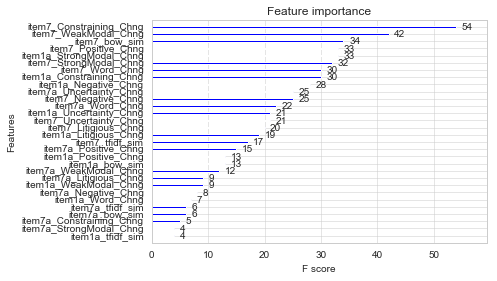

In [21]:
plot_importance(model)

In [29]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

In [27]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
print("Train Accuracy: ", accuracy_score(y_pred=model.predict(X_train), y_true=y_train))
preds = model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_pred=preds, y_true=y_test))
print("F1-Score: ", f1_score(y_pred=preds, y_true=y_test))
print("Precision: ", precision_score(y_pred=preds, y_true=y_test))
print("Recall: ", recall_score(y_pred=preds, y_true=y_test))

c:\users\acer\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Accuracy:  0.9399038461538461
Test Accuracy:  0.4520547945205479
F1-Score:  0.5620437956204378
Precision:  0.5273972602739726
Recall:  0.6015625


In [28]:
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
print("Train Accuracy: ", accuracy_score(y_pred=model.predict(X_train), y_true=y_train))
preds = model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_pred=preds, y_true=y_test))
print("F1-Score: ", f1_score(y_pred=preds, y_true=y_test))
print("Precision: ", precision_score(y_pred=preds, y_true=y_test))
print("Recall: ", recall_score(y_pred=preds, y_true=y_test))

Train Accuracy:  0.7043269230769231
Test Accuracy:  0.5570776255707762
F1-Score:  0.6734006734006734
Precision:  0.591715976331361
Recall:  0.78125


In [30]:
model = ExtraTreesClassifier(random_state=1)
model.fit(X_train, y_train)
print("Train Accuracy: ", accuracy_score(y_pred=model.predict(X_train), y_true=y_train))
preds = model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_pred=preds, y_true=y_test))
print("F1-Score: ", f1_score(y_pred=preds, y_true=y_test))
print("Precision: ", precision_score(y_pred=preds, y_true=y_test))
print("Recall: ", recall_score(y_pred=preds, y_true=y_test))

c:\users\acer\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train Accuracy:  0.9495192307692307
Test Accuracy:  0.4885844748858447
F1-Score:  0.5942028985507247
Precision:  0.5540540540540541
Recall:  0.640625


In [36]:
test["pred"] = preds
test["pred_prob"] = model.predict_proba(X_test)[:, 1]
train["pred"] = model.predict(X_train)
train["pred_prob"] = model.predict_proba(X_train)[:, 1]

In [37]:
syms = test.Symbol.unique()
syms.sort()

In [40]:
performance_results = pd.DataFrame()
for symbol in syms:
    y_actual = test[test.Symbol == symbol]["3_month_rtn"].apply(lambda x: 1 if x > 0 else -1)
    preds = test[test.Symbol == symbol]["pred"]
    proba = test[test.Symbol == symbol]["pred_prob"]
    performance_results[symbol] = [
        #roc_auc_score(y_actual, proba),
        accuracy_score(y_actual, preds),
        f1_score(y_actual, preds),
        recall_score(y_actual, preds),
        precision_score(y_actual, preds)
    ]

In [41]:
performance_results.index = ["accuracy", "f1", "recall", "precision"]

Text(0.5, 1.0, 'Performance Metrics Across Tickers (t+70 Returns)')

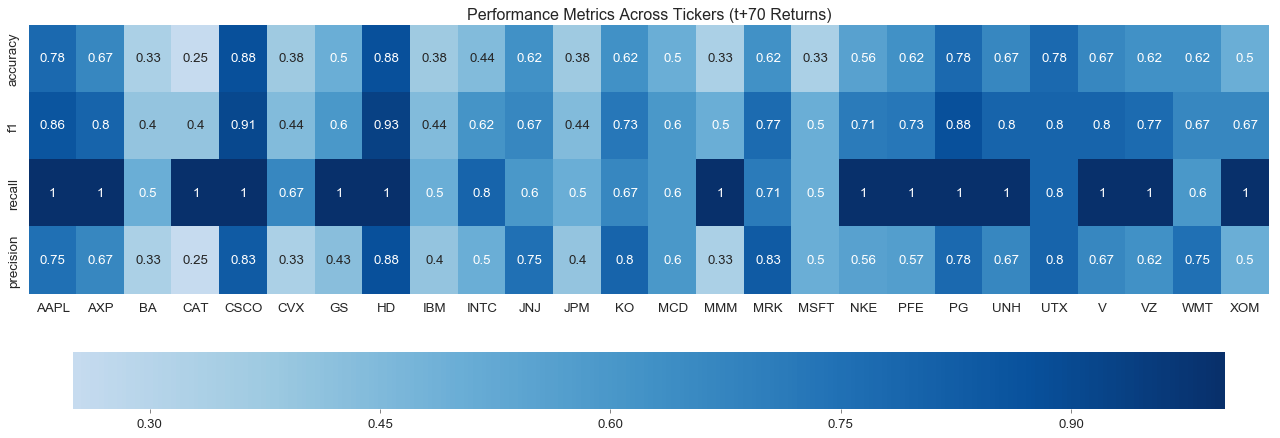

In [45]:
plt.figure(figsize=(20,6))
sns.heatmap(performance_results, cmap="Blues", annot=True, center=0.50, cbar_kws = dict(use_gridspec=False,location="bottom"))
plt.title("Performance Metrics Across Tickers (t+70 Returns)")

In [24]:
predicted = pd.concat([train, test])[["date", "Symbol", "pred", "pred_prob"]]

In [25]:
xls = pd.ExcelFile('../../Processed Data/10K10Q/stock_prices.xlsx')
stock_data = pd.read_excel(xls, sheet_name=None)

In [26]:
for ticker in stock_data:
    data = stock_data[ticker]
    data.Date = pd.to_datetime(data.Date, dayfirst=False)
    data["date"] = data.Date
    data.set_index("date", inplace=True)

In [27]:
daily_metrics_df = pd.DataFrame()
for sym in syms:
    temp = predicted[predicted.Symbol == sym].copy()
    temp.set_index("date", inplace=True)
    temp = temp.resample("B").ffill(limit=70).fillna(0)
    temp.index.rename("Date", inplace=True)
    temp.loc[:"2017-12-31"][["pred"]].rename({"pred":sym}, axis=1).to_csv(f"../../Predictions/10K10Q/{sym}_train_10k10Q.csv")
    temp.loc["2018-01-01":][["pred"]].rename({"pred":sym}, axis=1).to_csv(f"../../Predictions/10K10Q/{sym}_test_10k10Q.csv")
    
    daily_met = temp.merge(stock_data[sym]["Log Return"].apply(lambda x: 1 if x > 0 else -1), left_index=True, right_index=True)
    daily_metrics_df = pd.concat([daily_metrics_df, daily_met])

In [28]:
test = daily_metrics_df.loc["2018-01-01":].copy()

In [29]:
performance_results = pd.DataFrame()
for symbol in syms:
    y_actual = test[test.Symbol == symbol]["Log Return"]
    preds = test[test.Symbol == symbol]["pred"]
    proba = test[test.Symbol == symbol]["pred_prob"]
    performance_results[symbol] = [
        roc_auc_score(y_actual, proba),
        accuracy_score(y_actual, preds),
        f1_score(y_actual, preds),
        recall_score(y_actual, preds),
        precision_score(y_actual, preds)
    ]
performance_results.index = ["AUC", "accuracy", "f1", "recall", "precision"]

Text(0.5, 1.0, 'Resample to Daily')

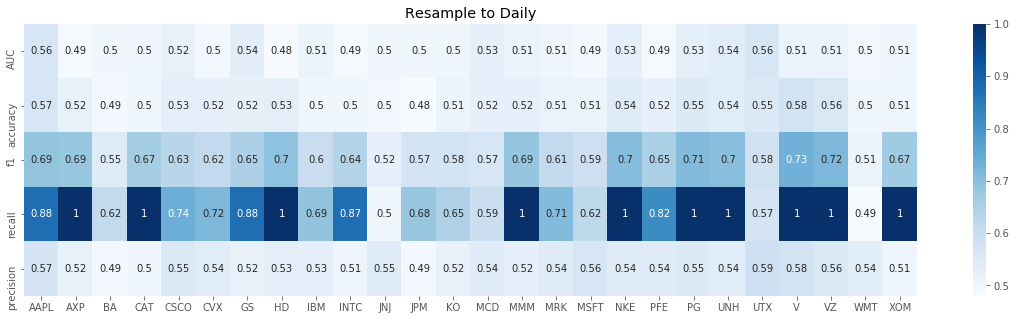

In [30]:
plt.figure(figsize=(20,5))
sns.heatmap(performance_results, cmap="Blues", annot=True)
plt.title("Resample to Daily")